In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Reading Data</h1>

In [133]:
headers = ["age", "workClass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", 
           "native-country", "income"]

In [134]:
train = pd.read_csv("../data/census-income.data", names = headers)
test = pd.read_csv("../data/census-income.test", skiprows = 1, names = headers)

In [135]:
train.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [136]:
test.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


<h1>Cleaning Data</h1>
<p>The Data contains extra spaces and dots and null values. Cleaning the data to remove these values.</p>

In [137]:
numerical = []
categorical = []

for header in headers:
    if train[header].dtype != np.dtype("int64"):
        categorical.append(header)
        train[header] = train[header].map(lambda x:x.strip(" "))
    else:
        numerical.append(header)

In [138]:
for header in headers:
    if test[header].dtype != np.dtype("int64"):
        test[header] = test[header].map(lambda x:x.strip(" "))

In [139]:
test["income"] = test["income"].map(lambda x:x.strip("."))

In [140]:
train = train.replace("?", np.nan)
test = test.replace("?", np.nan)

In [141]:
train.dropna(how = "any", inplace = True)
test.dropna(how = "any", inplace = True)

In [142]:
train.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [143]:
test.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<h1>Saving the cleaned data</h1>

In [144]:
train.to_csv("../data/censusTrain.csv", index = False)
test.to_csv("../data/censusTest.csv", index = False)

<h1>Loading the cleaned data</h1>

In [145]:
train = pd.read_csv("../data/censusTrain.csv")
test = pd.read_csv("../data/censusTest.csv")

In [146]:
train.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [147]:
test.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<h1>Visualization</h1>

In [165]:
def visualizeCategoricalData(data, features, hue, size):
    plots = len(features)
    cols = 2
    rows = plots//cols

    fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (size*cols, size*rows), constrained_layout = True)

    for position, category in enumerate(features):
        row = position // cols
        col = position % cols

        plot = sns.countplot(y = category, hue = hue, data = data, ax = axs[row][col])

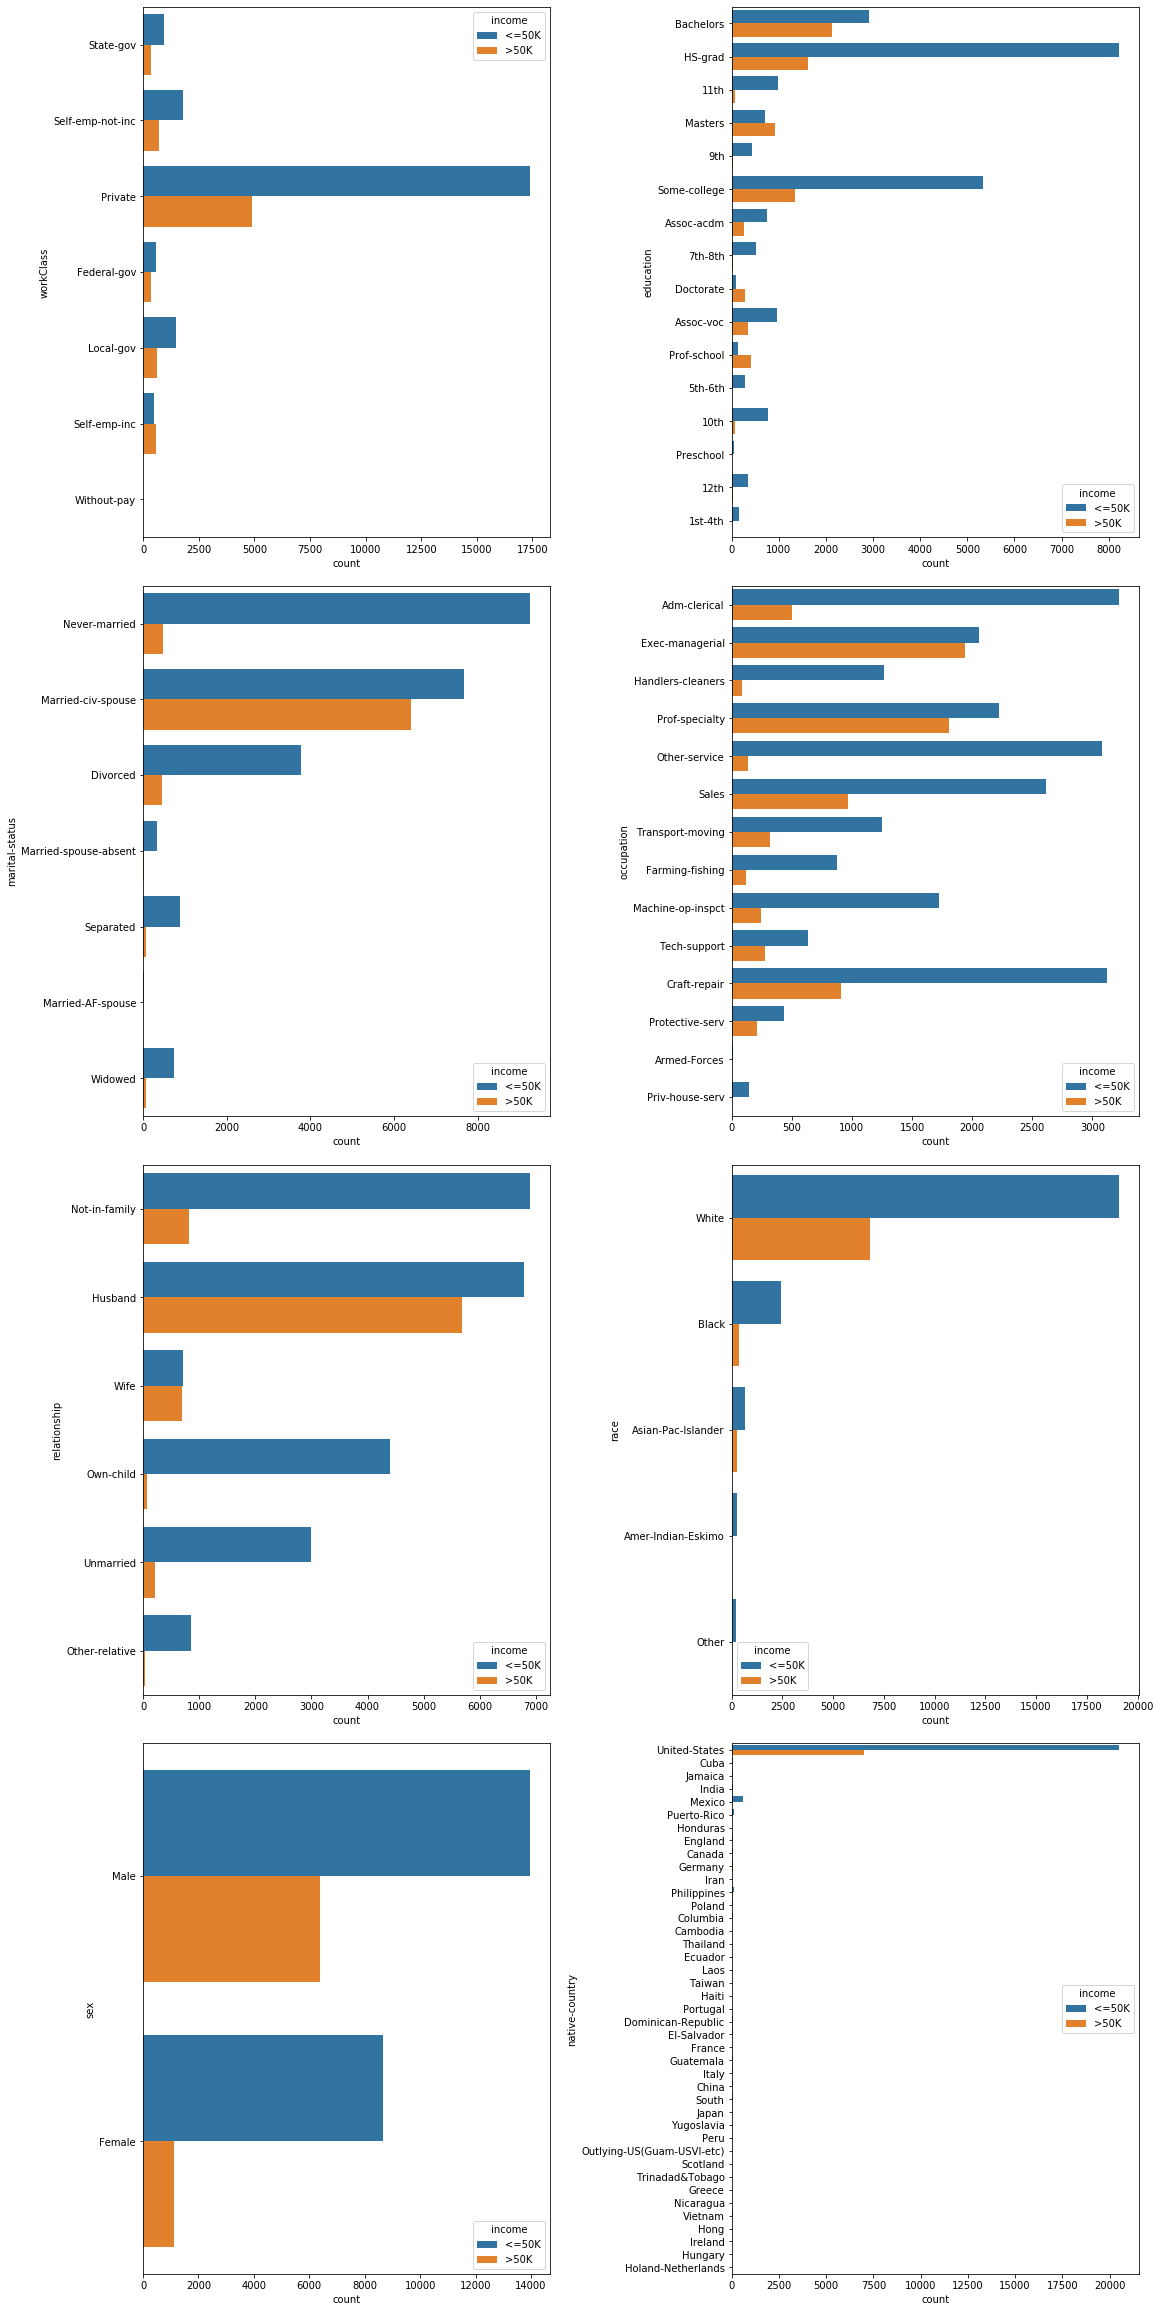

In [175]:
visualizeCategoricalData(train, categorical[:-1], "income", 8)

<h1>Numerical Encoding of categorical Data</h1>

In [176]:
train[["education", "education-num"]].head(15)

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


<p>As we can see above that, the columns eduaction and eduaction-num are both the same, eduaction-num is the numerical encoding of eduaction. So, we can drop one. It is ideal to drop eduaction becuase while model numerical features like eduaction-num are required.</p>

In [179]:
educationMappings = train[["education", "education-num"]]
# train = train.drop(columns = ["education"])

In [180]:
educationMappings

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
30157,Assoc-acdm,12
30158,HS-grad,9
30159,HS-grad,9
30160,HS-grad,9


In [107]:
train = train.replace("<=50K", 0).replace(">50K", 1)
test = test.replace("<=50K", 0).replace(">50K", 1)

In [108]:
train.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [109]:
test.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [110]:
train_list = train.values.tolist()
test_list = test.values.tolist()

In [78]:
train_list[0]

[39,
 'State-gov',
 77516,
 'Bachelors',
 13,
 'Never-married',
 'Adm-clerical',
 'Not-in-family',
 'White',
 'Male',
 2174,
 0,
 40,
 'United-States',
 0]

In [79]:
test_list[0]

[25,
 'Private',
 226802,
 '11th',
 7,
 'Never-married',
 'Machine-op-inspct',
 'Own-child',
 'Black',
 'Male',
 0,
 0,
 40,
 'United-States',
 0]